
# Result Analysis on VGGNet

In [1]:
import os
import sys

ROOT_PATH = os.getcwd()
ROOT_PATH = os.path.dirname(ROOT_PATH)
ROOT_PATH = os.path.dirname(ROOT_PATH)
sys.path.append(ROOT_PATH)


In [2]:
import pandas as pd
import numpy as np

import dataset
import evaluate
import metric
import util
import visualize
import densenet169

Using TensorFlow backend.


## Training

Let's train a model that takes in all body parts first.
The model use a 16 layer VGGNet with 3 colour channels. All weights are randomly initialized. It uses Adom optimizer with 
    beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False

Image perturbation includes:
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=30,
    fill_mode="constant",
    cval=0,
    horizontal_flip=True
    
All images are resized to 224*224 px

In [3]:
# Training Configurations
bpart = "all"
grayscale = False
batch_size = 16
learning_rate = 0.00001
epochs = 20
weight="imagenet"
resize=True
decay=0
reload=True

In [4]:
model = densenet169.DenseNet169(grayscale=grayscale, weight=weight, resize=resize)
history, model_path, result_path = model.train(batch_size=batch_size, learning_rate=learning_rate, epochs=epochs, bpart=bpart, decay=decay, reload=reload)

****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 18-41-18
Epoch 1/20
 - 1141s - loss: 0.5404 - binary_accuracy: 0.7275 - batch_recall: 0.6199 - global_recall: 0.6043 - global_kappa: 0.4233 - val_loss: 0.5646 - val_binary_accuracy: 0.7423 - val_batch_recall: 0.2906 - val_global_recall: 0.5444 - val_global_kappa: 0.4751
Epoch 2/20
 - 1056s - loss: 0.4692 - binary_accuracy: 0.7868 - batch_recall: 0.6748 - global_recall: 0.6591 - global_kappa: 0.5459 - val_loss: 0.4878 - val_binary_accuracy: 0.7767 - val_batch_recall: 0.3283 - val_global_recall: 0.6209 - val_global_kappa: 0.5466
Epoch 3/20
 - 1052s - loss: 0.4424 - binary_accuracy: 0.8003 - batch_recall: 0.6996 - global_recall: 0.6819 - global_kappa: 0.5758 - val_loss: 0.5422 - val_binary_accuracy: 0.7776 - val_batch_recall: 0.3243 - val_global_recall: 0.6124 - val_global_kappa: 0.5482
Epoch 4/20
 - 1030s - loss: 0.4249 - binary_accuracy: 0.813

#### Training history

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


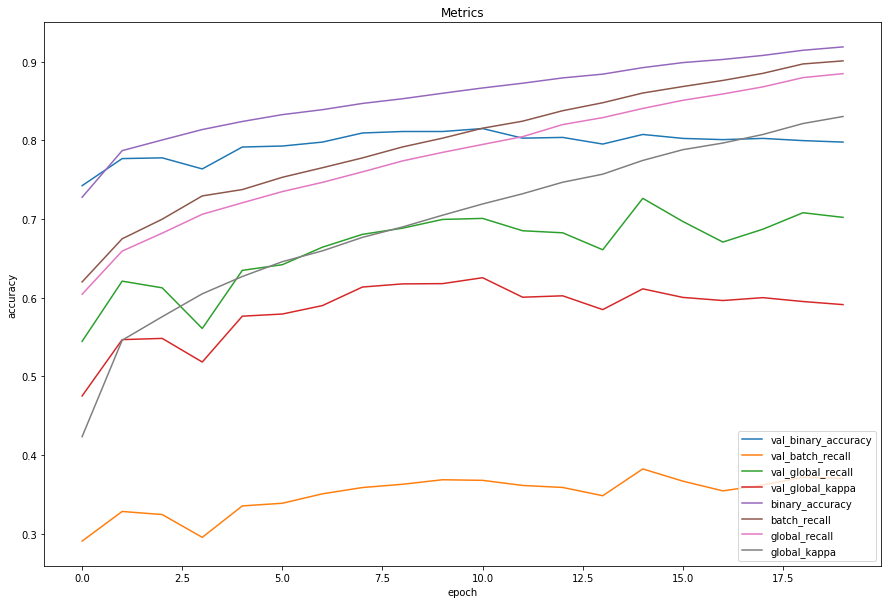

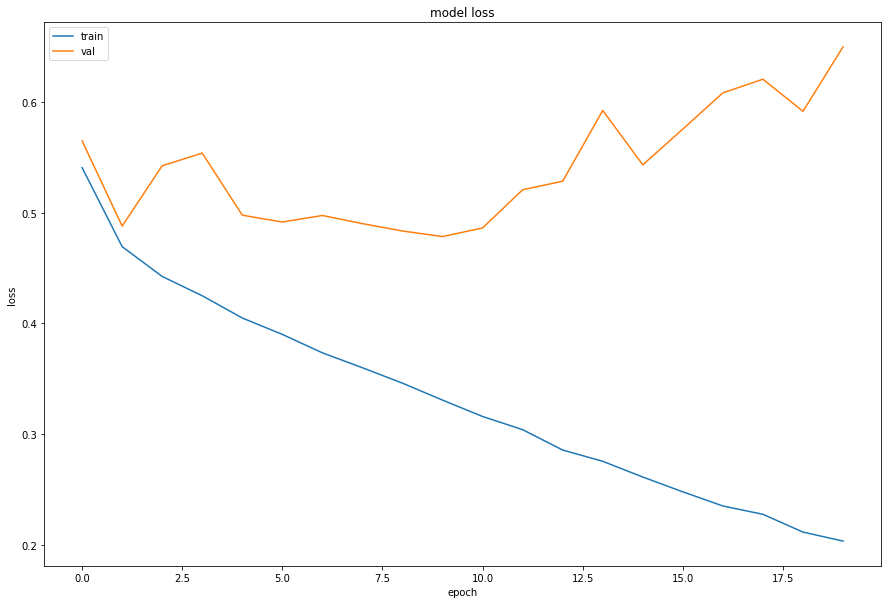

In [11]:
visualize.plot_history(history)

### Metrics

In [6]:
val_df = pd.read_csv(result_path)
evaluate.evl_result(val_df)

****** Evaluation per Image
Accuracy:  0.7976227713481389
Recall:    0.7019607843137254
Precision: 0.8490118577075099
Kappa:     0.5915941963170679
Contingency Table:
 1074            191
  456           1476
Number of Inputs: 3197
****** Evaluation per Study Using Highest Score
Accuracy:  0.8006672226855713
Recall:    0.8029739776951673
Precision: 0.7646017699115044
Kappa:     0.5989669123666829
Contingency Table:
  432            133
  106            528
Number of Inputs: 1199
****** Evaluation per Study Using Lowest Score
Accuracy:  0.7823185988323603
Recall:    0.5650557620817844
Precision: 0.918429003021148
Kappa:     0.5436710291276291
Contingency Table:
  304             27
  234            634
Number of Inputs: 1199
****** Evaluation per Study Using Average Score
Accuracy:  0.8240200166805671
Recall:    0.7063197026022305
Precision: 0.8775981524249422
Kappa:     0.6377181840443003
Contingency Table:
  380             53
  158            608
Number of Inputs: 1199


Both averaging or picking the max prediction score from each image of the same study achieves the better overall result. Apperantly having more images helps the model determing whether there is an abnormal.

Interestingly, averaging the prediction score from each image of the same study achieves the best kappa. It does make sense however compare to the other aggregation, since averaging does not favor false positive or false negative.

#### Let's look at each body part

In [7]:
for g, df in val_df.groupby(val_df["body_part"]):
    print("****** Evaluation per body part: {} ******".format(g))
    evaluate.evl_result(df)
    print("\n\n")

****** Evaluation per body part: elbow ******
****** Evaluation per Image
Accuracy:  0.8666666666666667
Recall:    0.8304347826086956
Precision: 0.8925233644859814
Kappa:     0.7331049805591554
Contingency Table:
  191             23
   39            212
Number of Inputs: 465
****** Evaluation per Study Using Highest Score
Accuracy:  0.8481012658227848
Recall:    0.9090909090909091
Precision: 0.7692307692307693
Kappa:     0.6955684007707125
Contingency Table:
   60             18
    6             74
Number of Inputs: 158
****** Evaluation per Study Using Lowest Score
Accuracy:  0.8417721518987342
Recall:    0.6515151515151515
Precision: 0.9555555555555556
Kappa:     0.6594240386273493
Contingency Table:
   43              2
   23             90
Number of Inputs: 158
****** Evaluation per Study Using Average Score
Accuracy:  0.879746835443038
Recall:    0.803030303030303
Precision: 0.8983050847457628
Kappa:     0.7490386223039622
Contingency Table:
   53              6
   13           

## Visualization

#### Attention

In [15]:
importlib.reload(visualize)

<module 'visualize' from 'D:\\Code\\mura\\visualize.py'>

In [13]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

Populating the interactive namespace from numpy and matplotlib


d:\code\mura\env\lib\site-packages\keras\models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


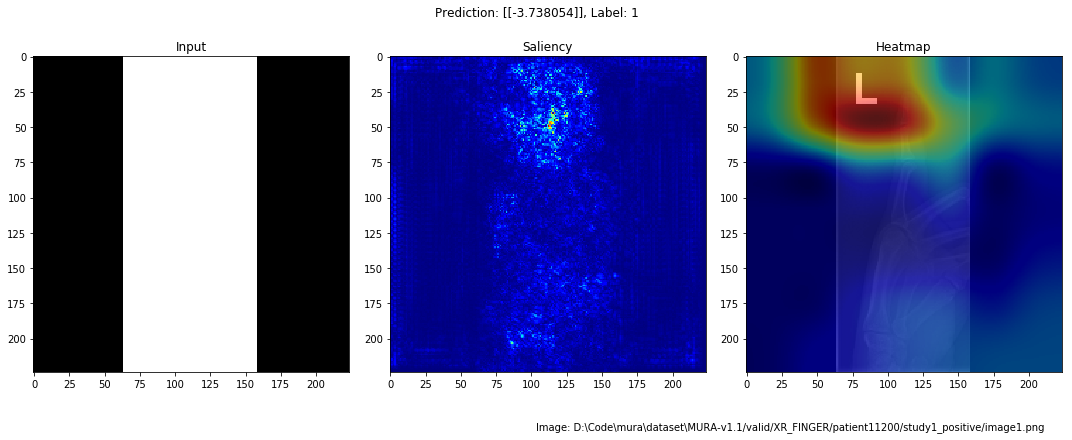

In [ ]:
for _ in range(10):
    visualize.plt_attention(model_path, bpart=bpart, grayscale=grayscale)

#### Activation

In [ ]:
visualize.plt_activation(model_path, layer_idx=-1, max_iter=2000)

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,910)

In [ ]:
visualize.plt_activation(model_path, layer_idx=util.find_last_conv2d(model.model))

## Compare to train a separate model for each body part

In [ ]:
for bp in val_df["body_part"].unique():
    md = densenet169.DenseNet169(grayscale=grayscale, weight=weight, resize=resize)
    hs, mp, rp = model.train(batch_size=batch_size, learning_rate=learning_rate, epochs=epochs, bpart=bp, decay=decay, verbose=0)
    print("****** Evaluation per body part: {} ******".format(bp))
    evaluate.evl_result(pd.read_csv(rp))
    print("\n\n")